In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

# Lab 4

## Problem 1

Text(0, 0.5, 'Earth Longitude (deg)')

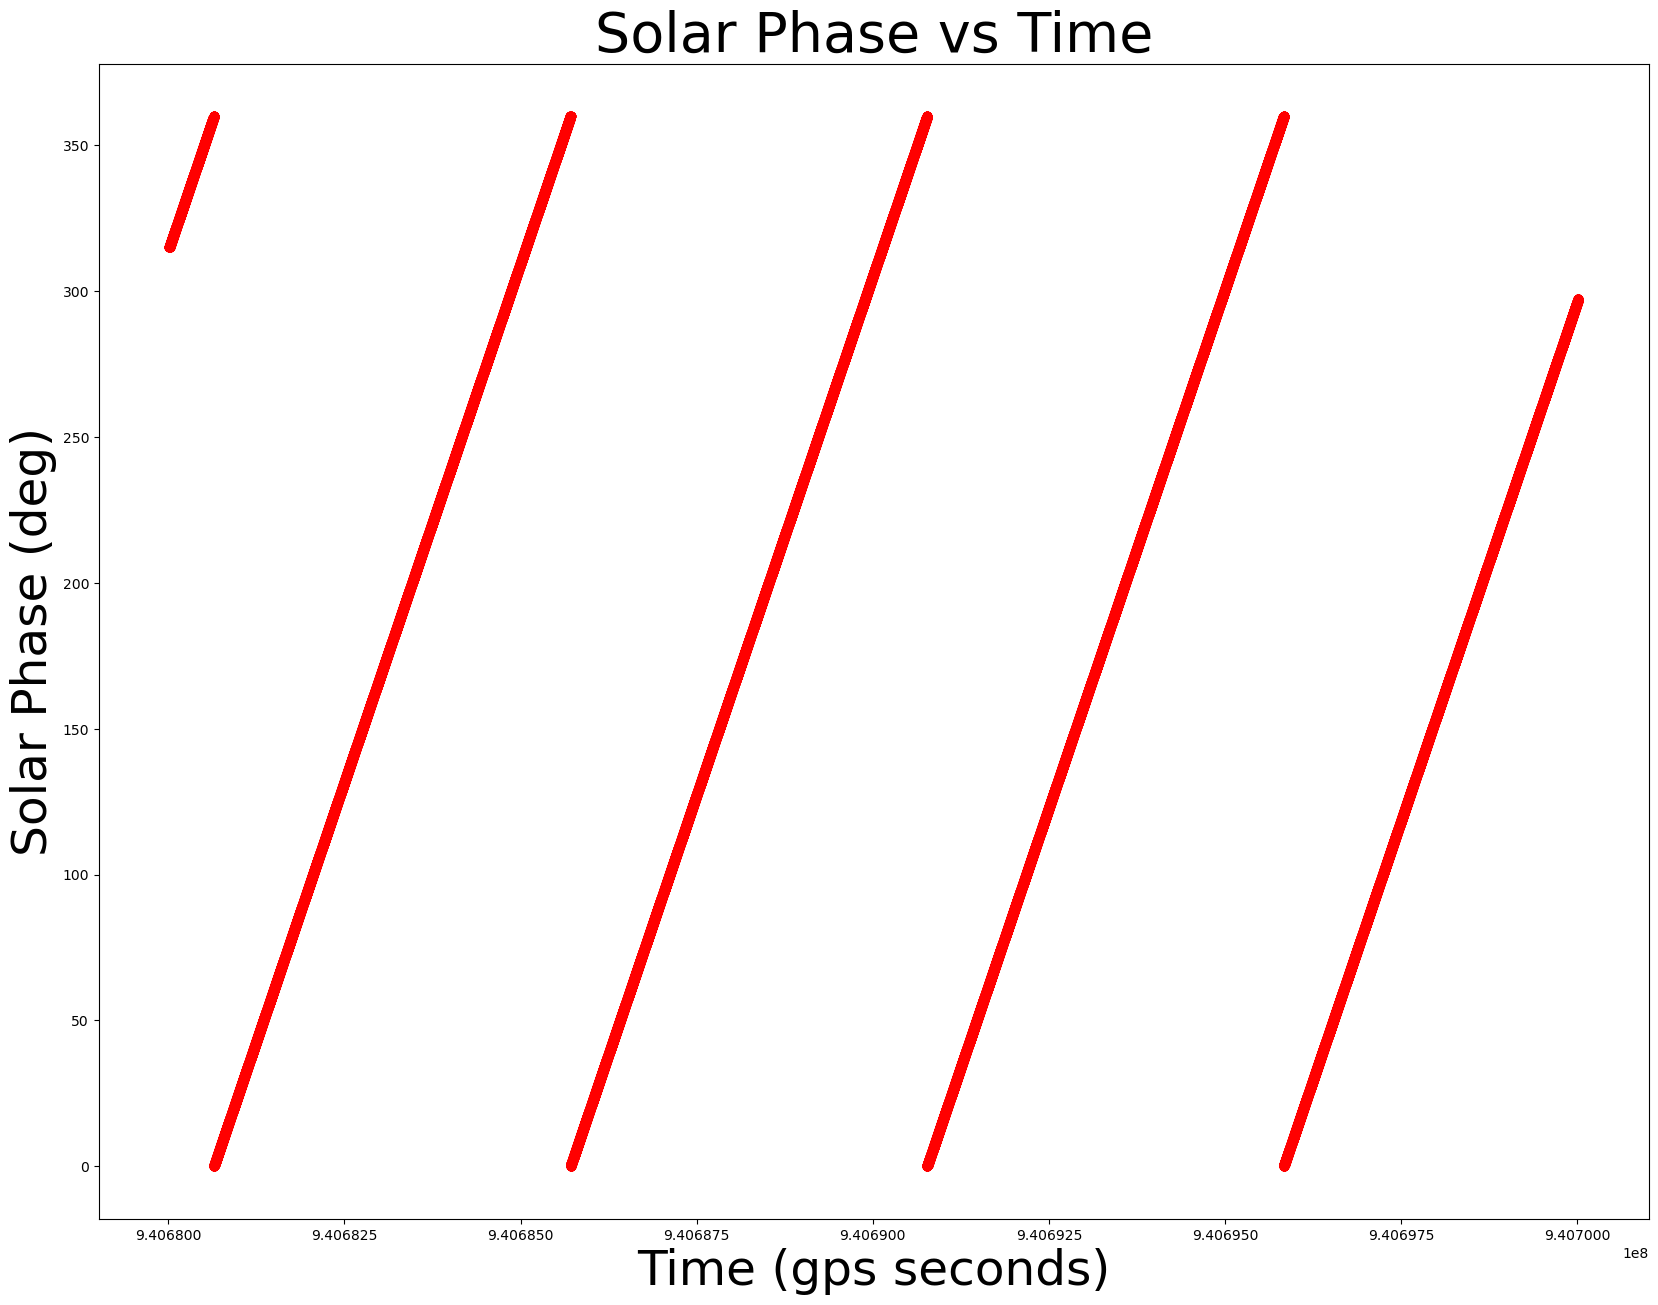

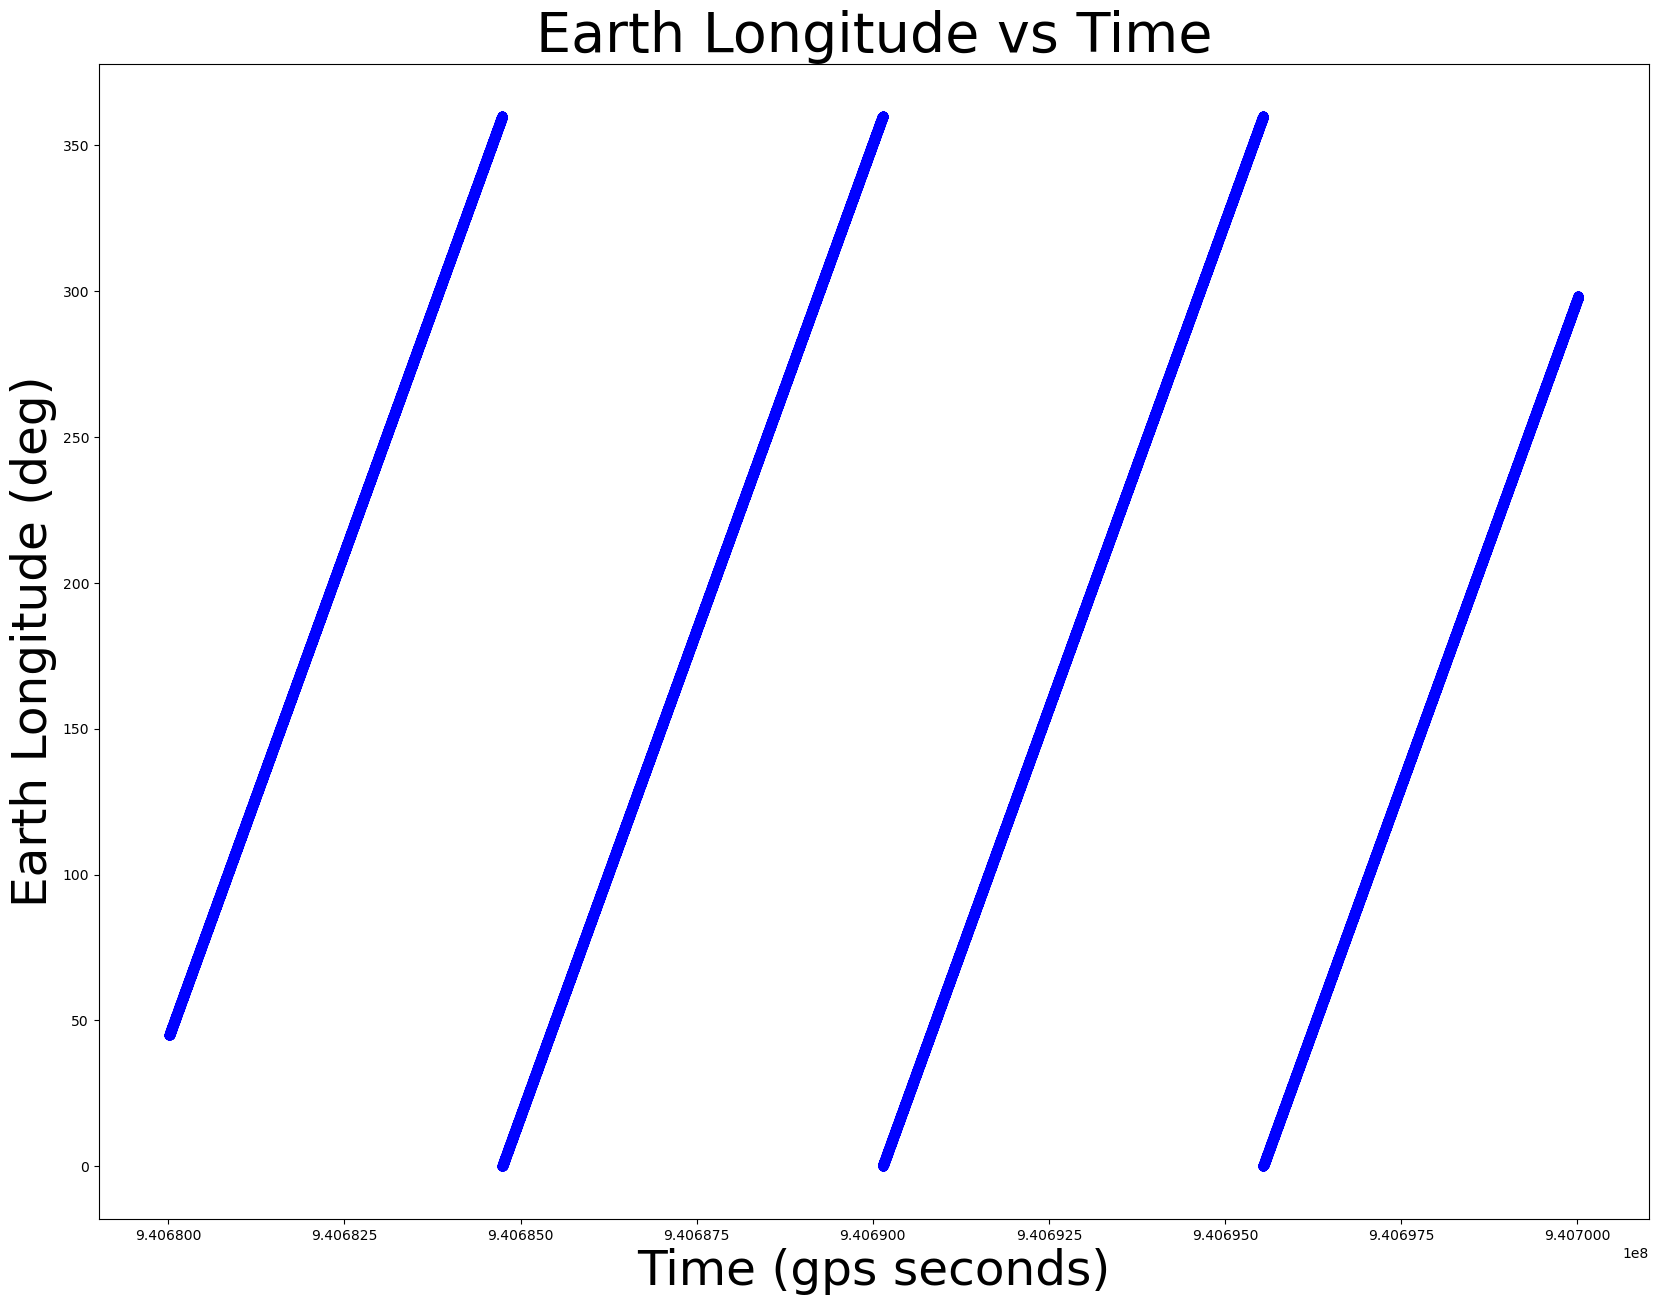

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')
hf.keys()
data = np.array(hf.get('data'))
start = 0
end = 200000

time = data[0,:]
solar = data[1,:]
longitude = data[2,:]
particle = data[3,:]
fig, ax = plt.subplots()

ax.plot(time[start:end], solar[start:end], 'o', color = 'red')
plt.title('Solar Phase vs Time', fontsize = 40)
plt.xlabel('Time (gps seconds)', fontsize = 35)
plt.ylabel('Solar Phase (deg)', fontsize = 35)

fig, ax = plt.subplots()
ax.plot(time[start:end], longitude[start:end], 'o', color = 'blue')
plt.title('Earth Longitude vs Time', fontsize = 40)
plt.xlabel('Time (gps seconds)', fontsize = 35)
plt.ylabel('Earth Longitude (deg)', fontsize = 35)

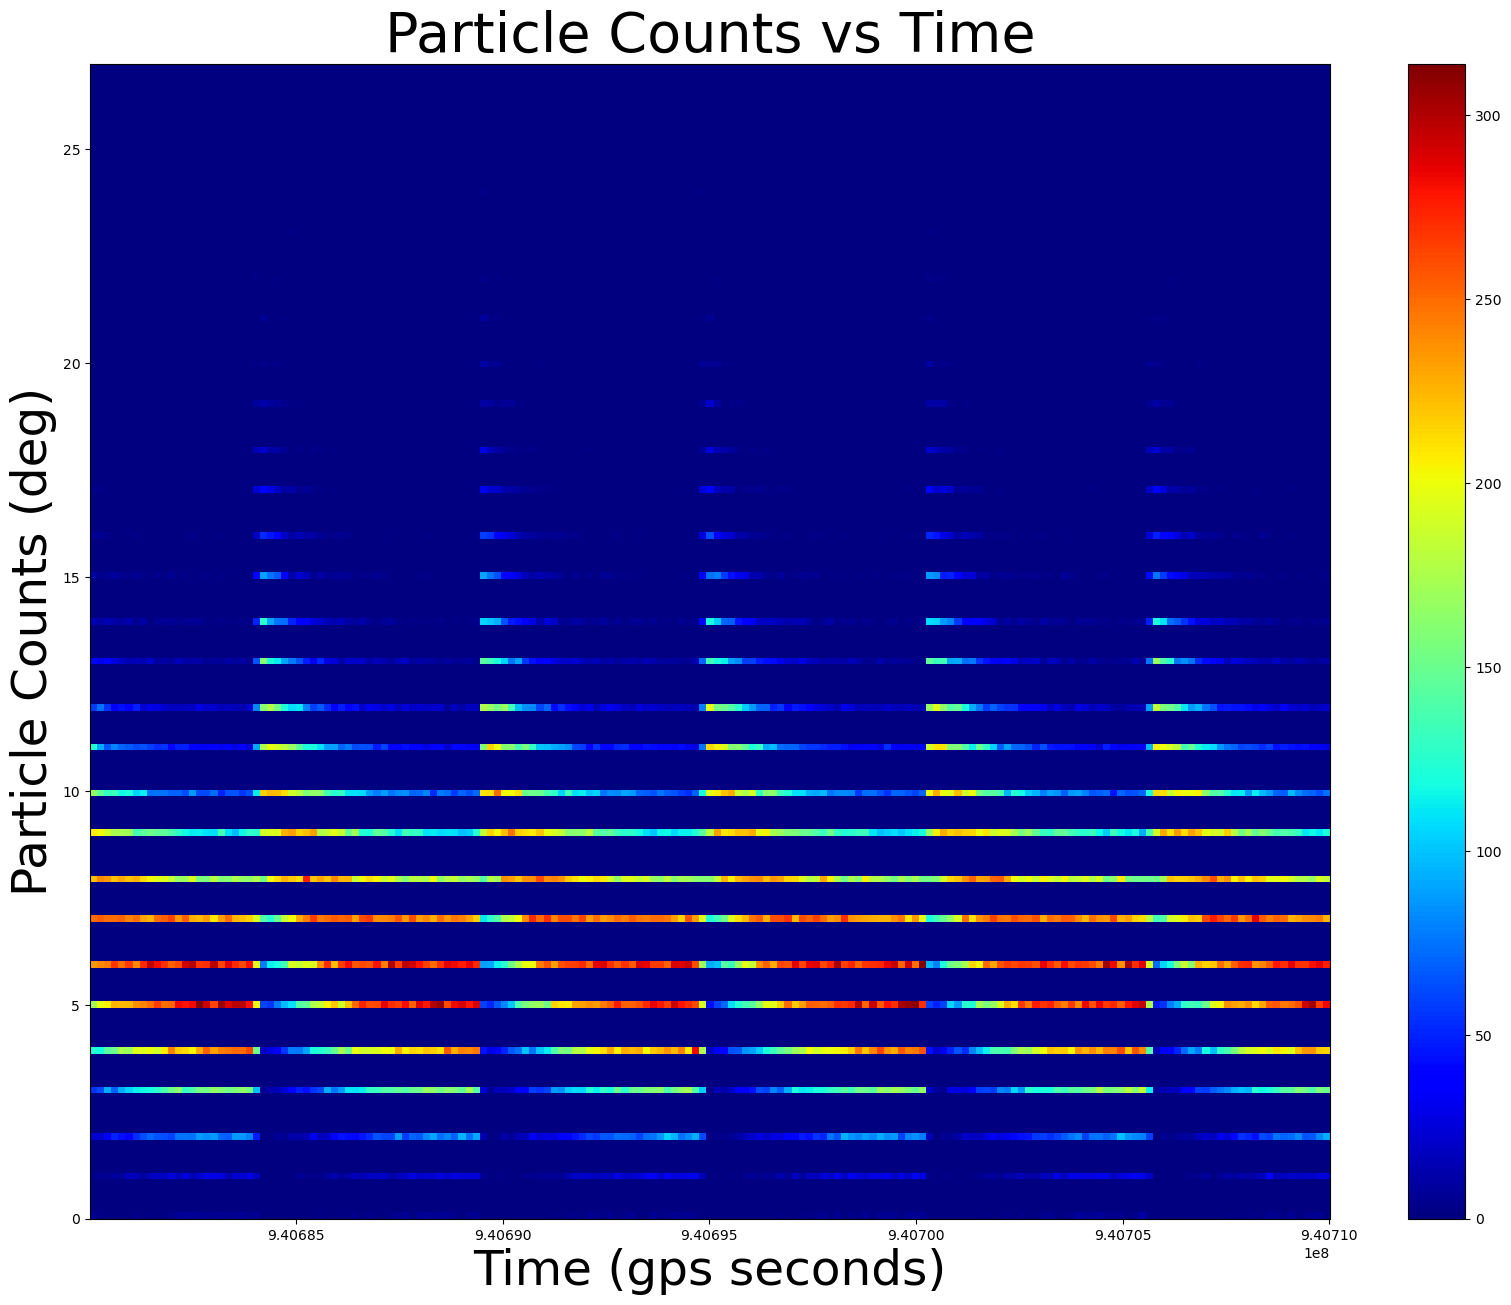

In [3]:
binsize = 175
start2 = 0
end2 = 300000
plt.hist2d(time[start2:end2], particle[start2:end2], bins = (binsize, binsize), cmap=plt.cm.jet)
plt.title('Particle Counts vs Time', fontsize = 40)
plt.xlabel('Time (gps seconds)', fontsize = 35)
plt.ylabel('Particle Counts (deg)', fontsize = 35)
plt.colorbar()

Text(0, 0.5, 'Earth Longitude (deg)')

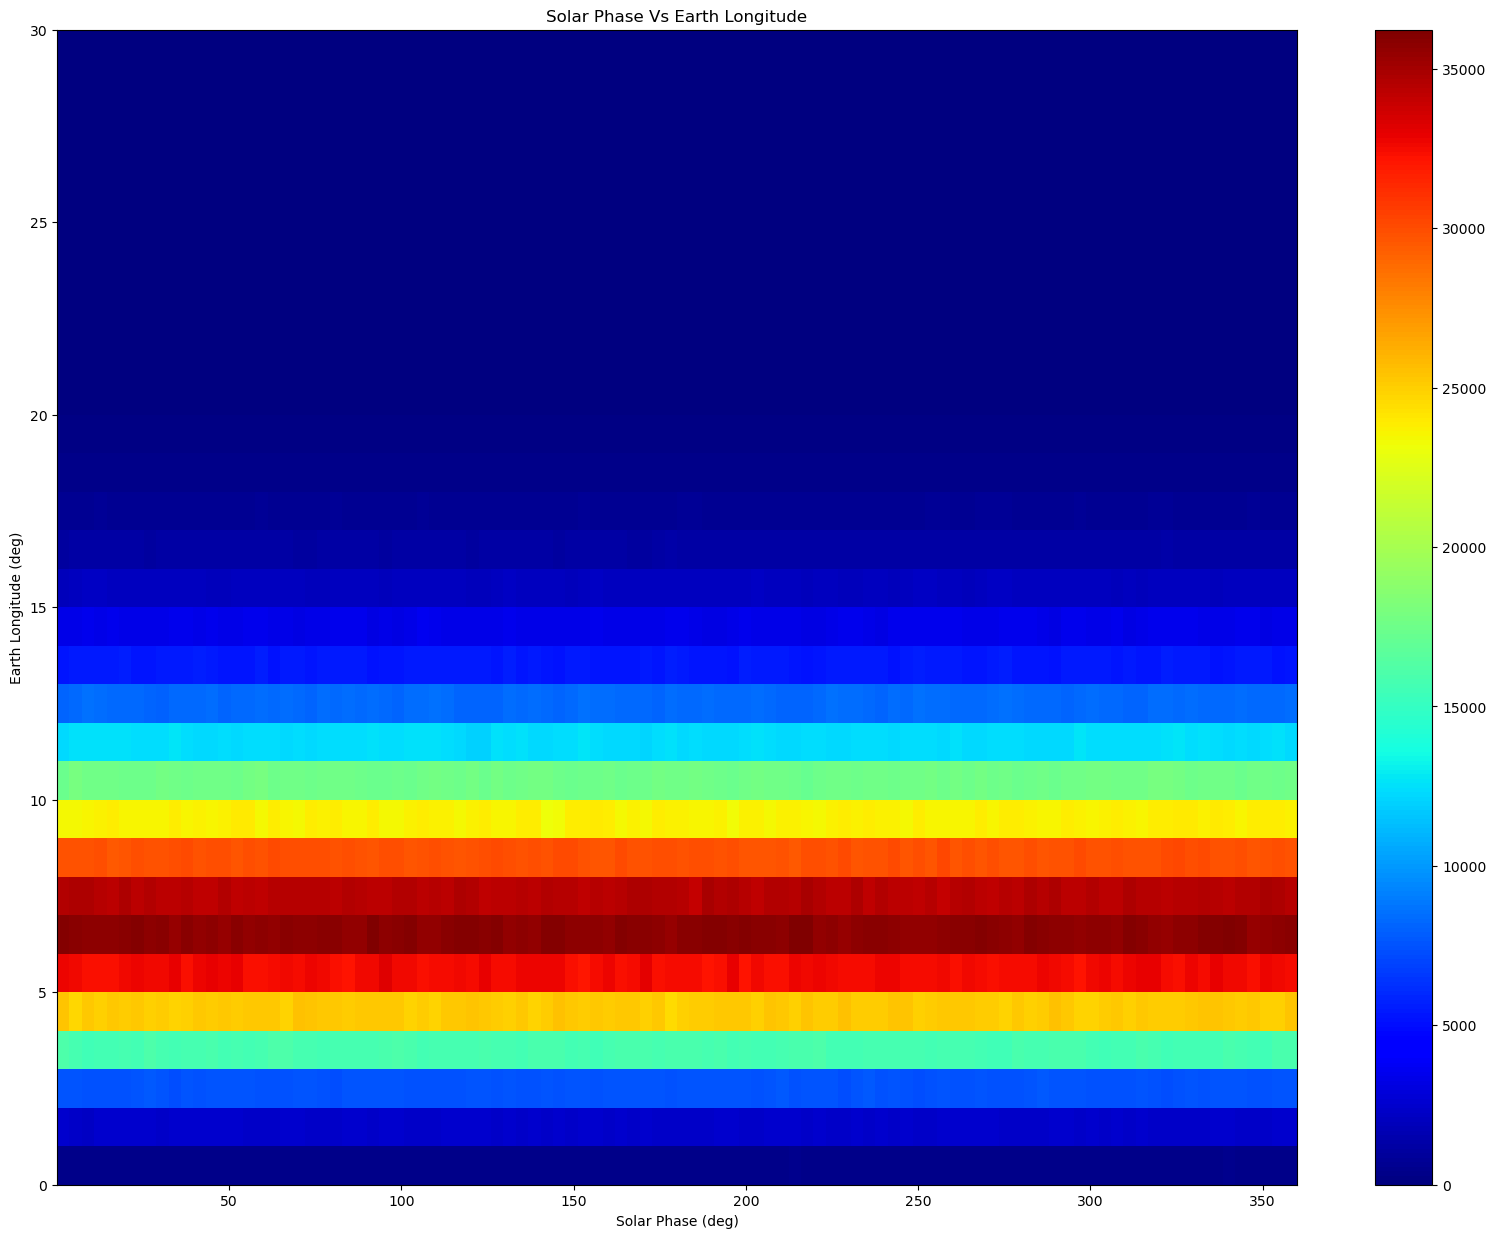

In [4]:
plt.hist2d(solar, particle, bins = (100, 30), cmap=plt.cm.jet)
plt.colorbar()
plt.title('Solar Phase Vs Earth Longitude')
plt.xlabel('Solar Phase (deg)')
plt.ylabel('Earth Longitude (deg)')

Text(0, 0.5, 'Particle Counts')

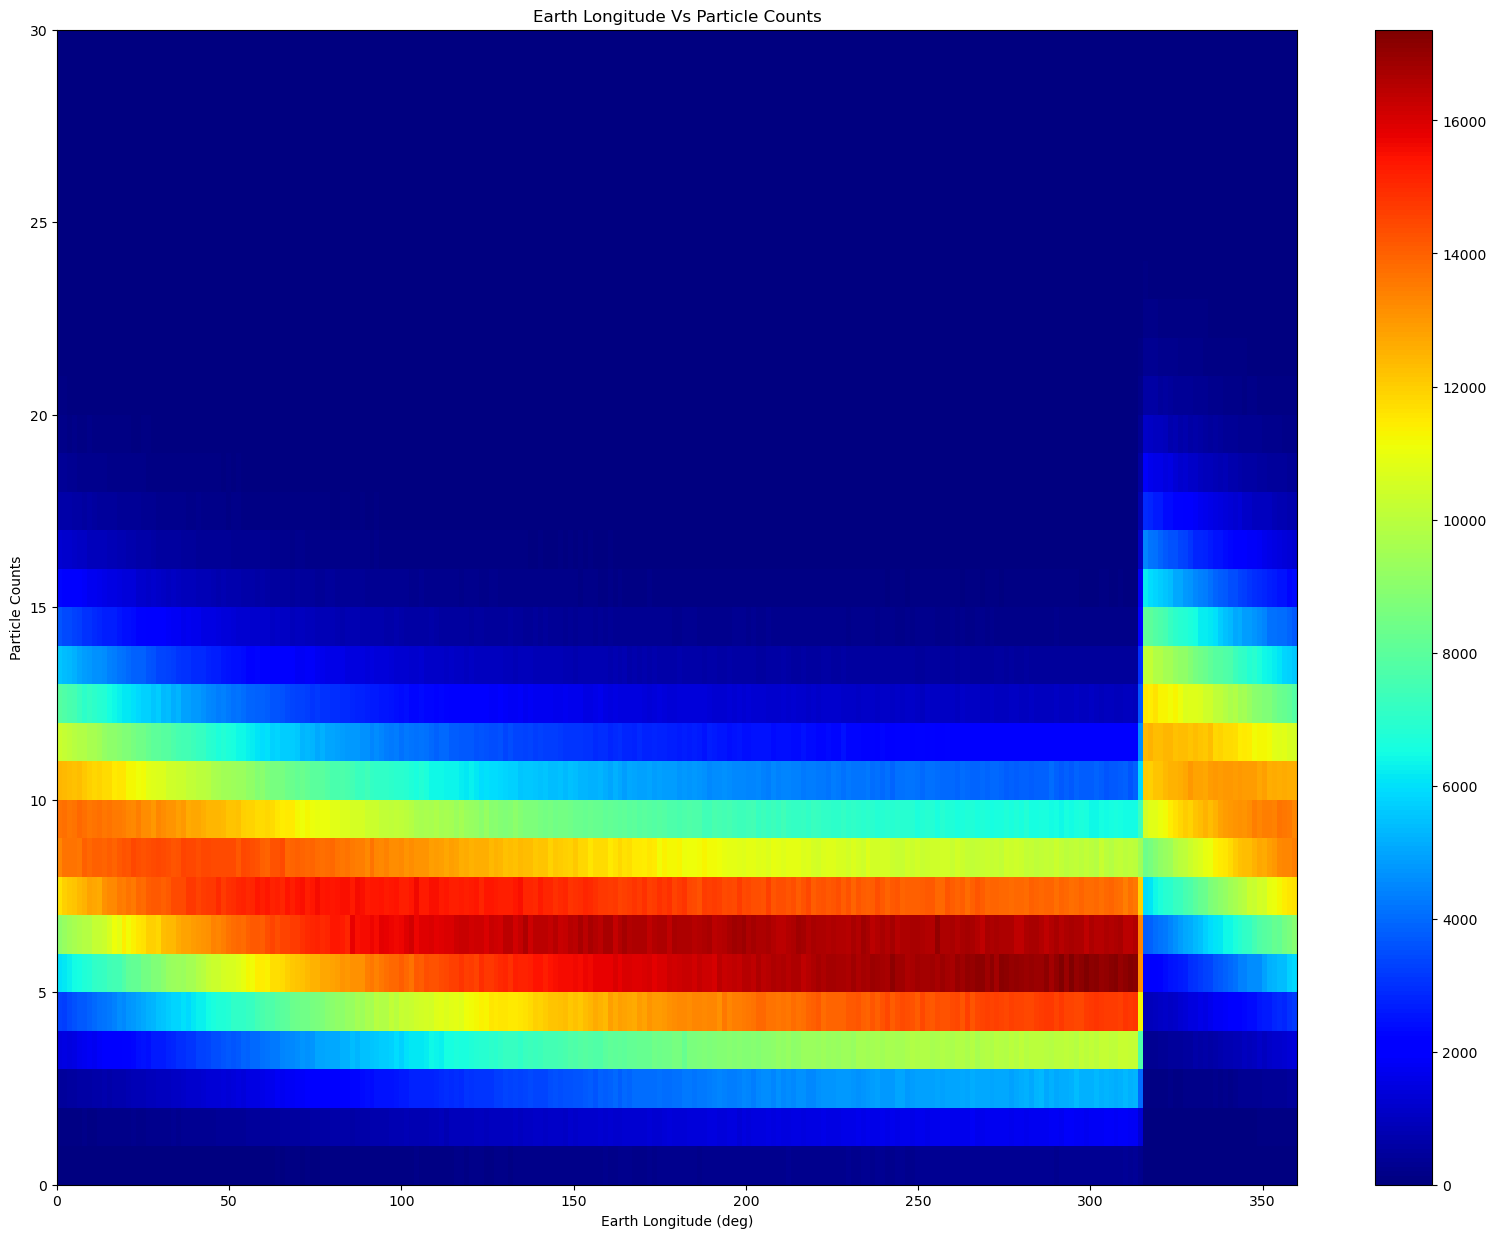

In [5]:
plt.hist2d(longitude, particle, bins = (250, 30), cmap=plt.cm.jet)
plt.xlabel('Longitude')
plt.ylabel('Particle Counts')
plt.colorbar()
plt.title('Earth Longitude Vs Particle Counts')
plt.xlabel('Earth Longitude (deg)')
plt.ylabel('Particle Counts')

Both solar phase and earth longitude have linear relationship with time. When I plot them in 2d for particle counts and time, there is period for the distribution. From the second 2d histogram, earth longitude and solar phase remains independent. Furthermore, for the third 2d histogram, there is an obvious shift, indicating a probability distribution.

Text(0, 0.5, 'Average Particle Counts')

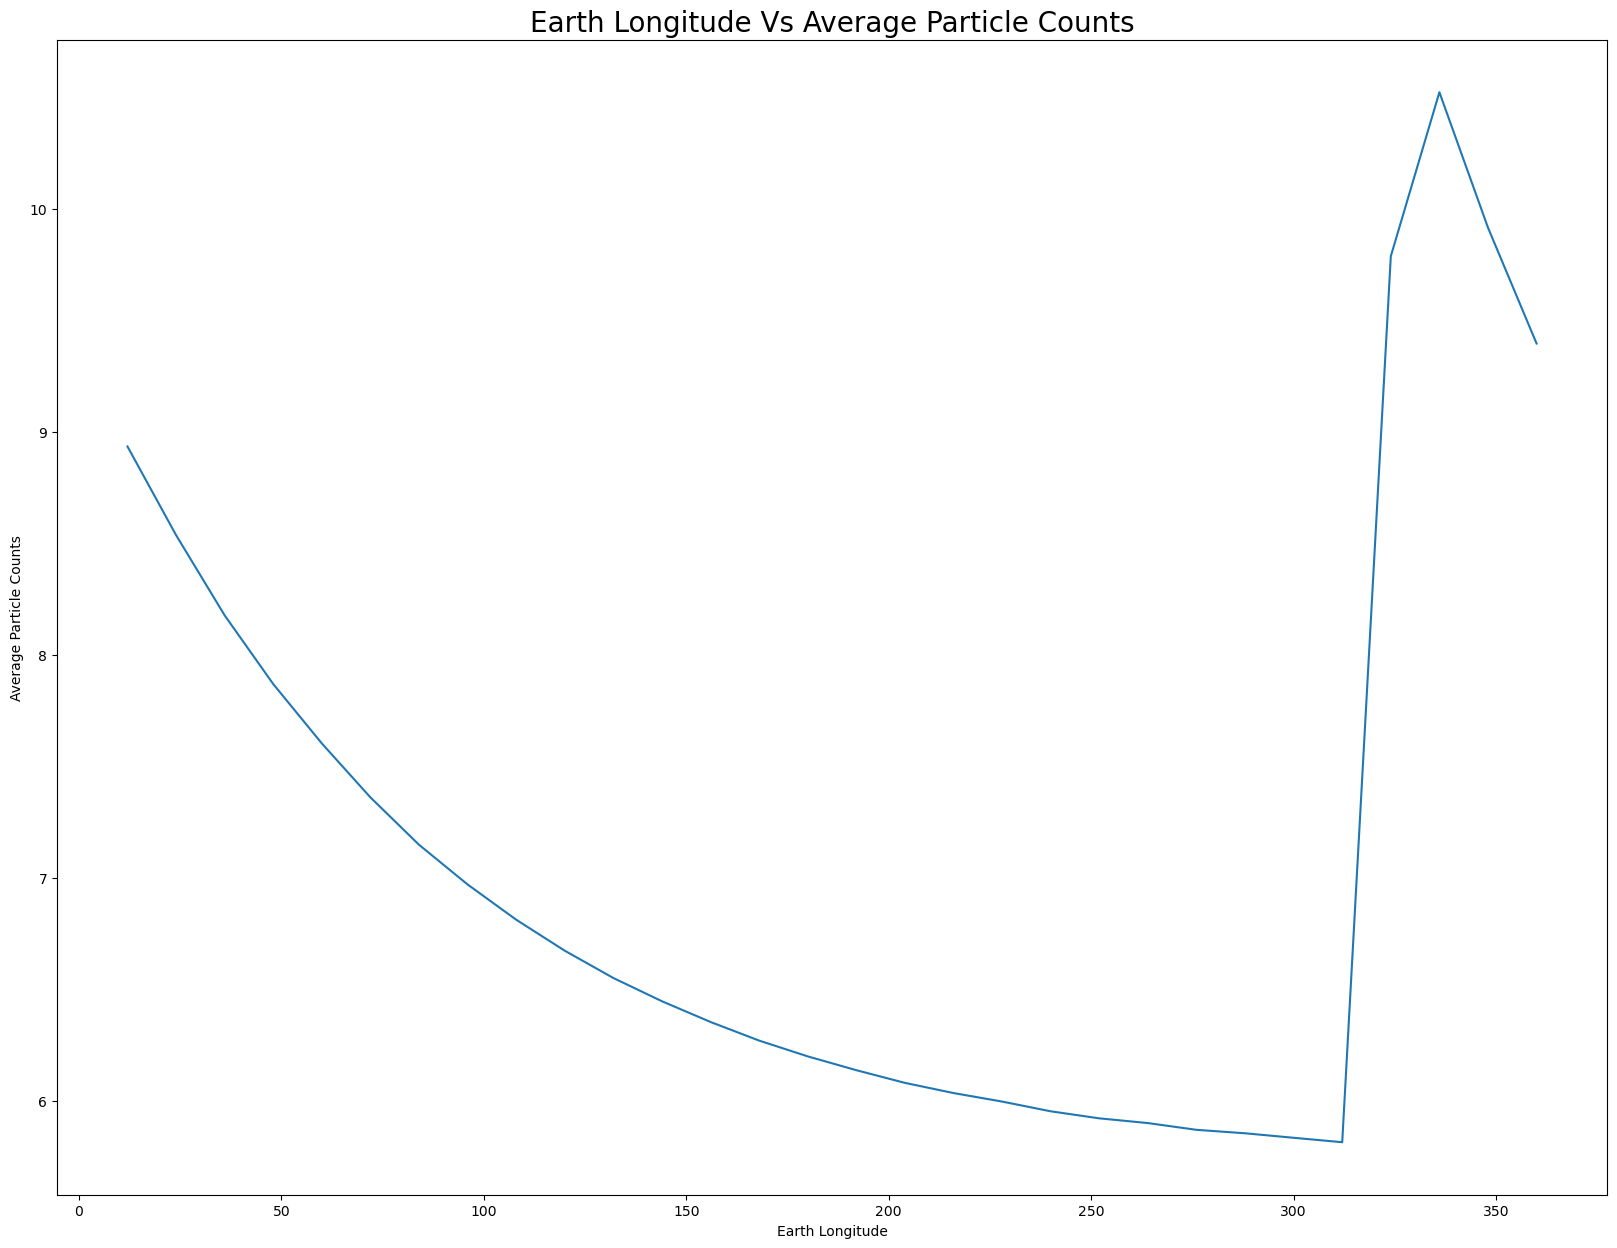

In [6]:
hist, bin_edges = np.histogram(longitude, bins = 30)
average = []
long = []
for i in range(len(bin_edges) - 1):
    mask = (longitude > bin_edges[i]) & (longitude < bin_edges[i + 1])
    particles = particle[mask].mean()
    average.append(particles)
    long.append(bin_edges[i + 1])
plt.plot(long, average)
plt.title('Earth Longitude Vs Average Particle Counts', fontsize = 20)
plt.xlabel('Earth Longitude', fontsize = 10)
plt.ylabel('Average Particle Counts', fontsize = 10)

<ipython-input-7-0c9d084ae705>:5: RuntimeWarning: Mean of empty slice.
  particles = particle[mask].mean()
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Average Particle Counts')

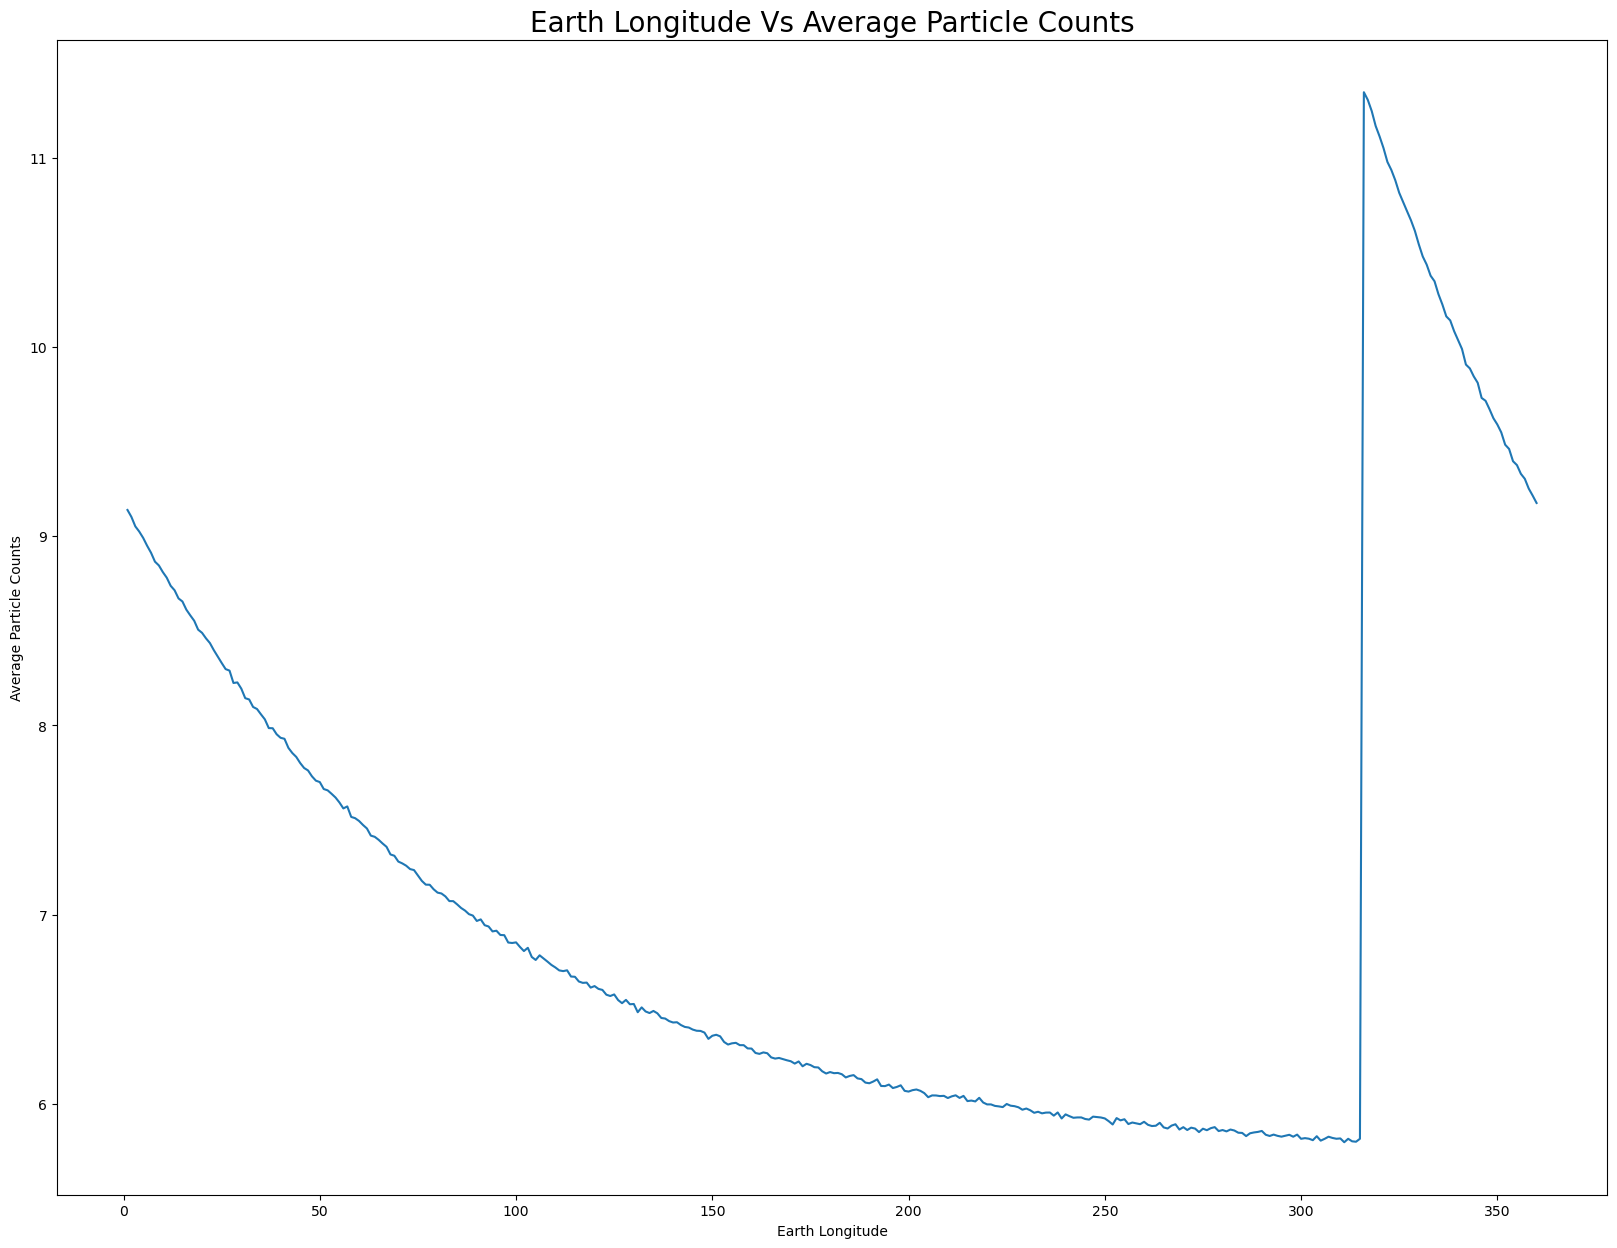

In [7]:
average = []
long = []
for i in range(361):
    mask = (longitude > i) & (longitude < i + 1)
    particles = particle[mask].mean()
    average.append(particles)
    long.append(i + 1)
plt.plot(long, average)
plt.title('Earth Longitude Vs Average Particle Counts', fontsize = 20)
plt.xlabel('Earth Longitude', fontsize = 10)
plt.ylabel('Average Particle Counts', fontsize = 10)

In [8]:
print(max(average))
print(np.where(average == max(average)))
print(long[1])
scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-1*b*t), long[:315], average[:315], p0 = (9.1, 1))

11.348336129753916
(array([315]),)
2


<ipython-input-8-89dbf3aa144e>:4: RuntimeWarning: overflow encountered in exp
  scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-1*b*t), long[:315], average[:315], p0 = (9.1, 1))
<ipython-input-8-89dbf3aa144e>:4: RuntimeWarning: overflow encountered in multiply
  scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(-1*b*t), long[:315], average[:315], p0 = (9.1, 1))


(array([8.24324982e+00, 1.40641362e-03]),
 array([[1.52206864e-03, 9.52066683e-07],
        [9.52066683e-07, 8.55274101e-10]]))

The trendline of the above graph is $y = 8.2432*e^{-0.001406x}$ <br>
The model trendline fits the graph pretty well using the command.

### c

[11.  9.  4. ...  4.  6.  6.]


Text(0, 0.5, 'Probability')

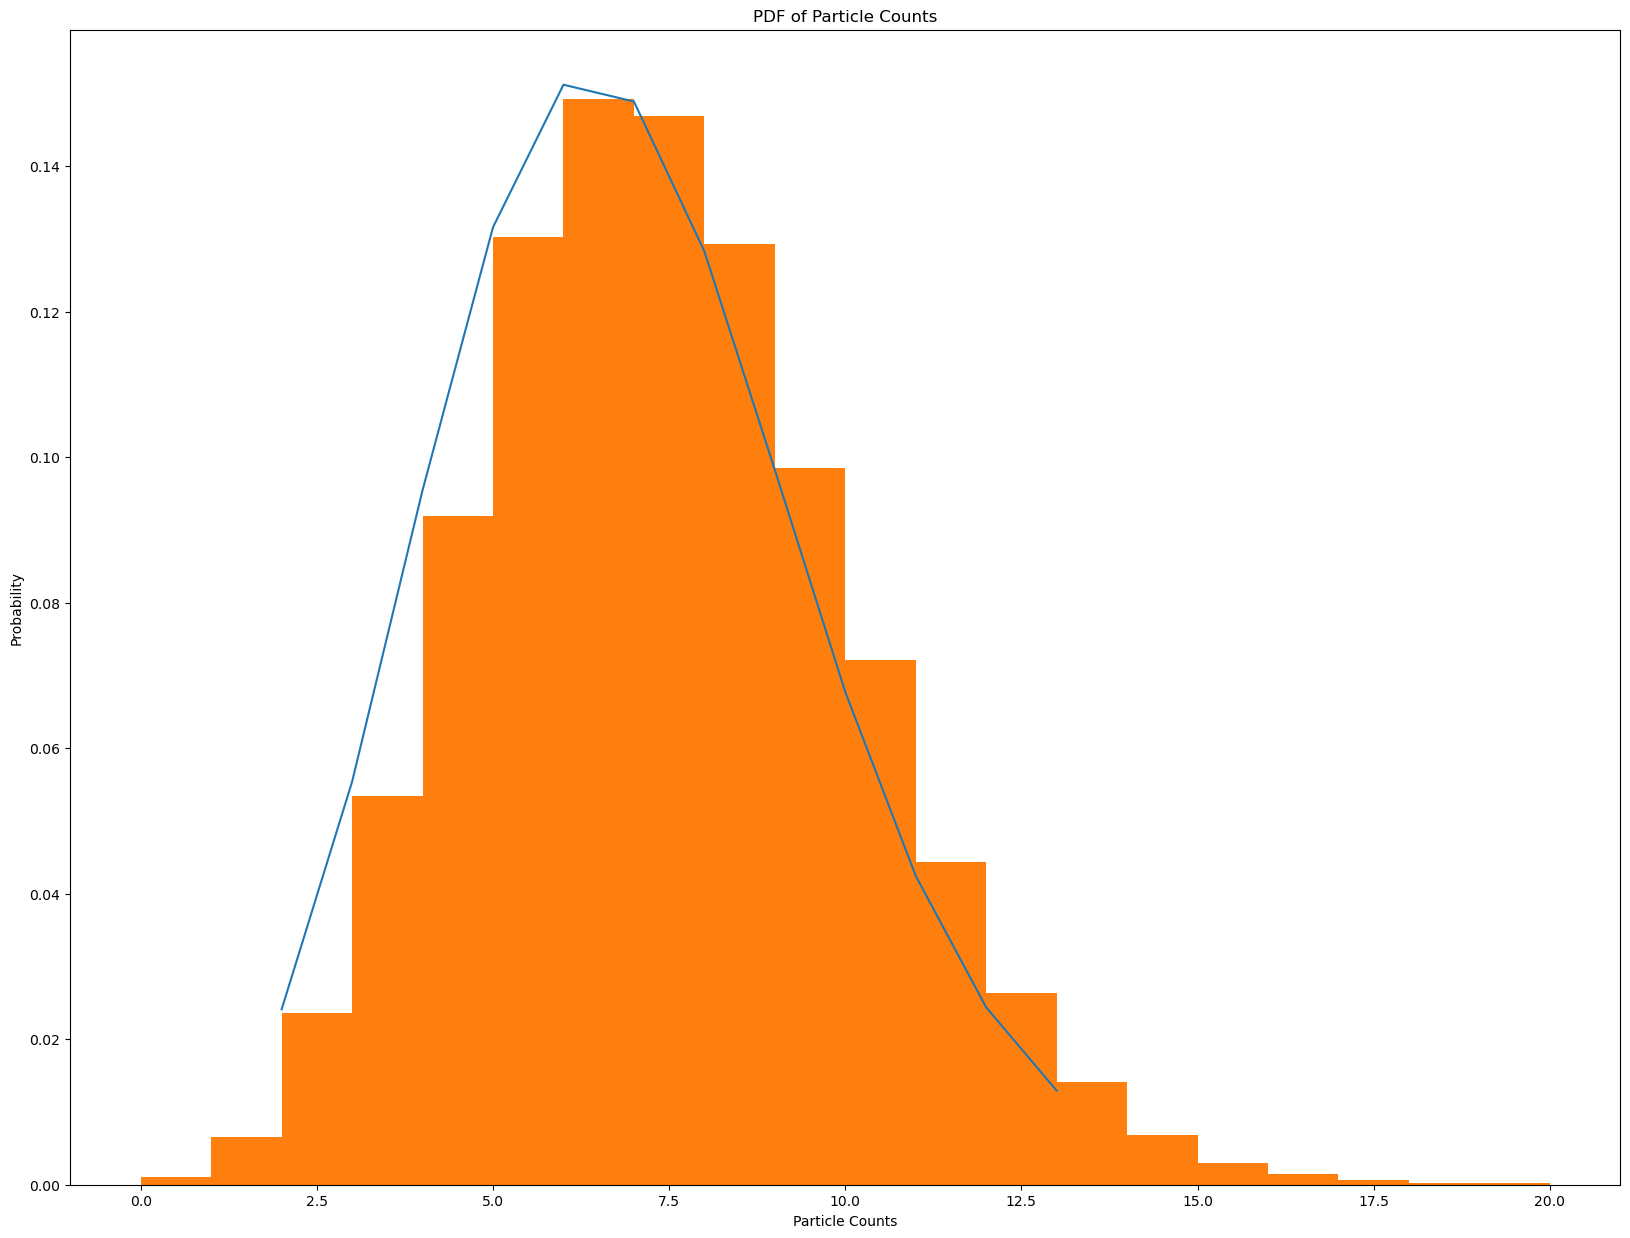

In [9]:
# Time starts from 940680016 seconds
long = (45 + (2/30)*(time[700] - 940680016)) % 360
mean1 = particle[(longitude > long) & (longitude > long + 1)].mean()
mean = mean1
d = stats.poisson(mean)
x = np.arange(stats.poisson.ppf(0.01, mean),
              stats.poisson.ppf(0.99, mean))
plt.plot(x, stats.poisson.pmf(x, mean))

for x in range(0, 360):
    mask = (longitude > x) & (longitude < x + 1)
    particles = particle[mask].mean()
    if ((particles < mean + 0.1) & (particles > mean - 0.1)):
        print(particle[mask])
        plt.hist(particle[mask], bins = 20, density = True)
        break

plt.title('PDF of Particle Counts')
plt.xlabel('Particle Counts')
plt.ylabel('Probability')

### d

In [10]:
for x in range(0, 360):
    mask = (longitude > x) & (longitude < x + 1)
    particles = particle[mask].mean()
    count = stats.poisson.ppf(1 - stats.norm.sf(5), particles)
    print("Threshold is " + str(count) + " counts with " + str(x) + " Earth Longitude")

Threshold is 28.0 counts with 0 Earth Longitude
Threshold is 28.0 counts with 1 Earth Longitude
Threshold is 28.0 counts with 2 Earth Longitude
Threshold is 28.0 counts with 3 Earth Longitude
Threshold is 28.0 counts with 4 Earth Longitude
Threshold is 27.0 counts with 5 Earth Longitude
Threshold is 27.0 counts with 6 Earth Longitude
Threshold is 27.0 counts with 7 Earth Longitude
Threshold is 27.0 counts with 8 Earth Longitude
Threshold is 27.0 counts with 9 Earth Longitude
Threshold is 27.0 counts with 10 Earth Longitude
Threshold is 27.0 counts with 11 Earth Longitude
Threshold is 27.0 counts with 12 Earth Longitude
Threshold is 27.0 counts with 13 Earth Longitude
Threshold is 27.0 counts with 14 Earth Longitude
Threshold is 27.0 counts with 15 Earth Longitude
Threshold is 27.0 counts with 16 Earth Longitude
Threshold is 27.0 counts with 17 Earth Longitude
Threshold is 27.0 counts with 18 Earth Longitude
Threshold is 27.0 counts with 19 Earth Longitude
Threshold is 27.0 counts with 

These are the thresholds of 5 sigma corresponding to one period (0 ~ 359)

## Problem 2

### 1

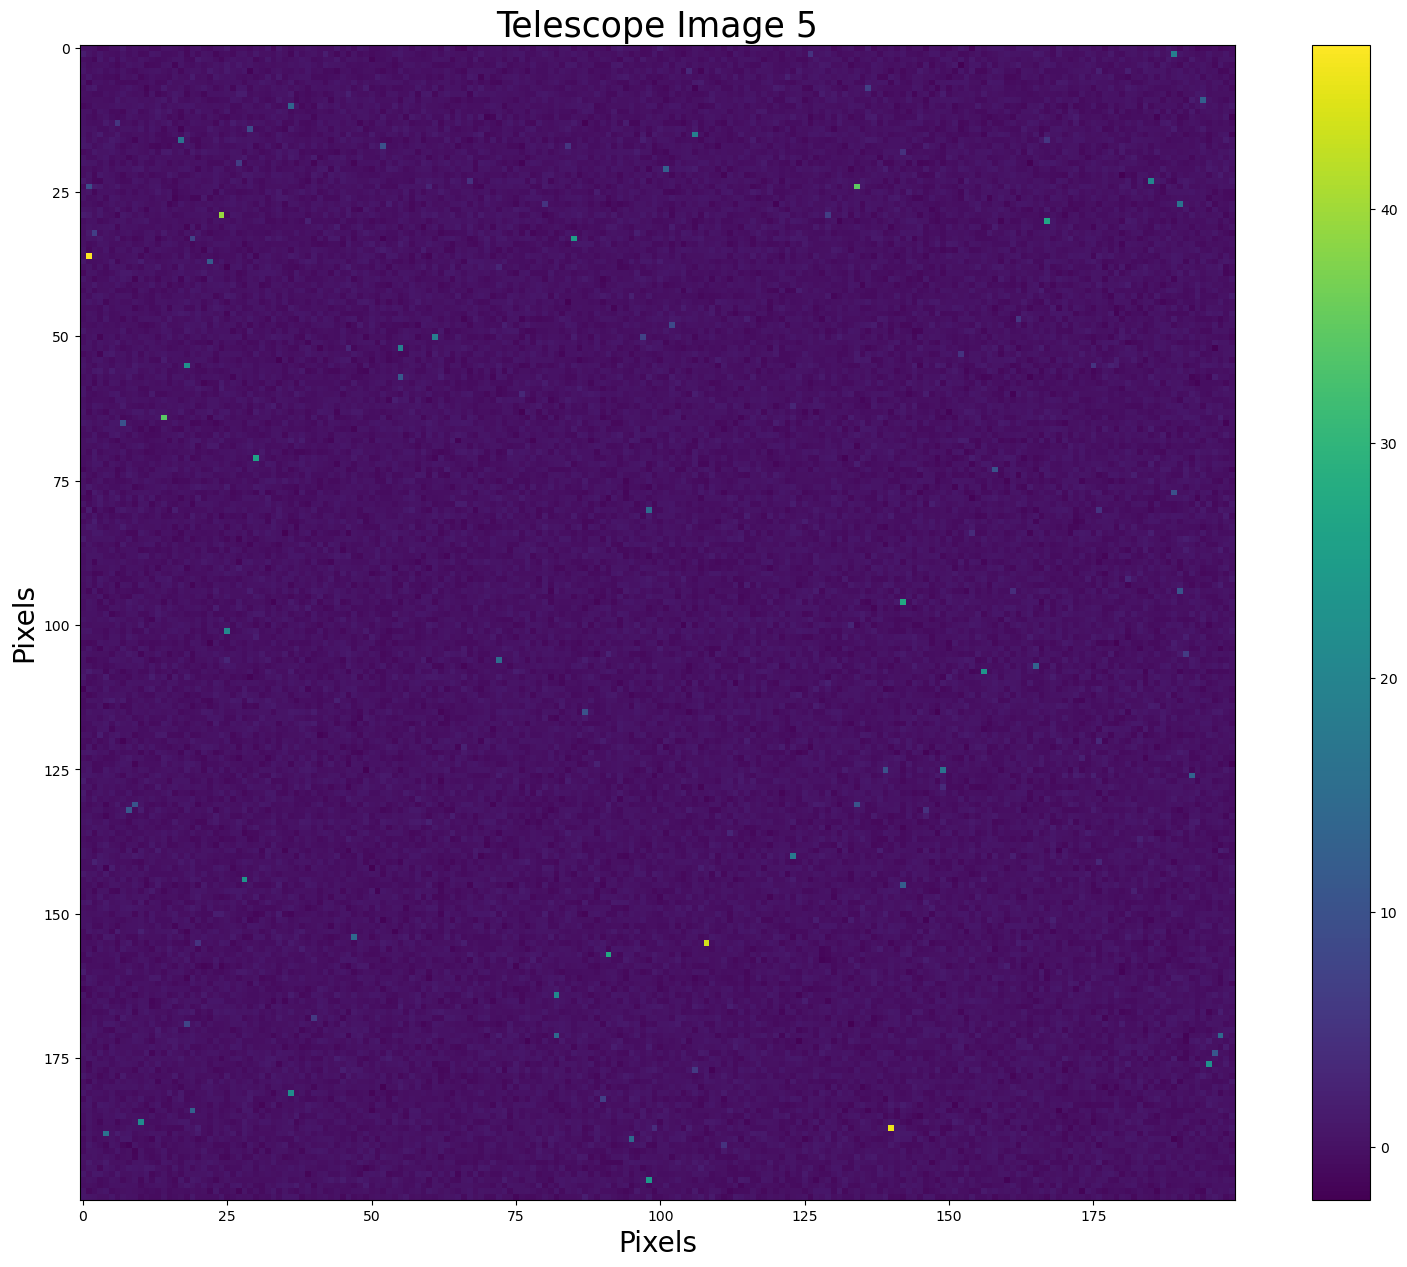

In [11]:
hf = h5py.File('images.h5', 'r')
hf.keys()
imagestack = np.array(hf.get('imagestack'))
plt.imshow(imagestack[:,:,4])
plt.title('Telescope Image 5', fontsize = 25)
plt.xlabel('Pixels', fontsize = 20)
plt.ylabel('Pixels', fontsize = 20)
plt.colorbar()

(-30.0, 200.0)

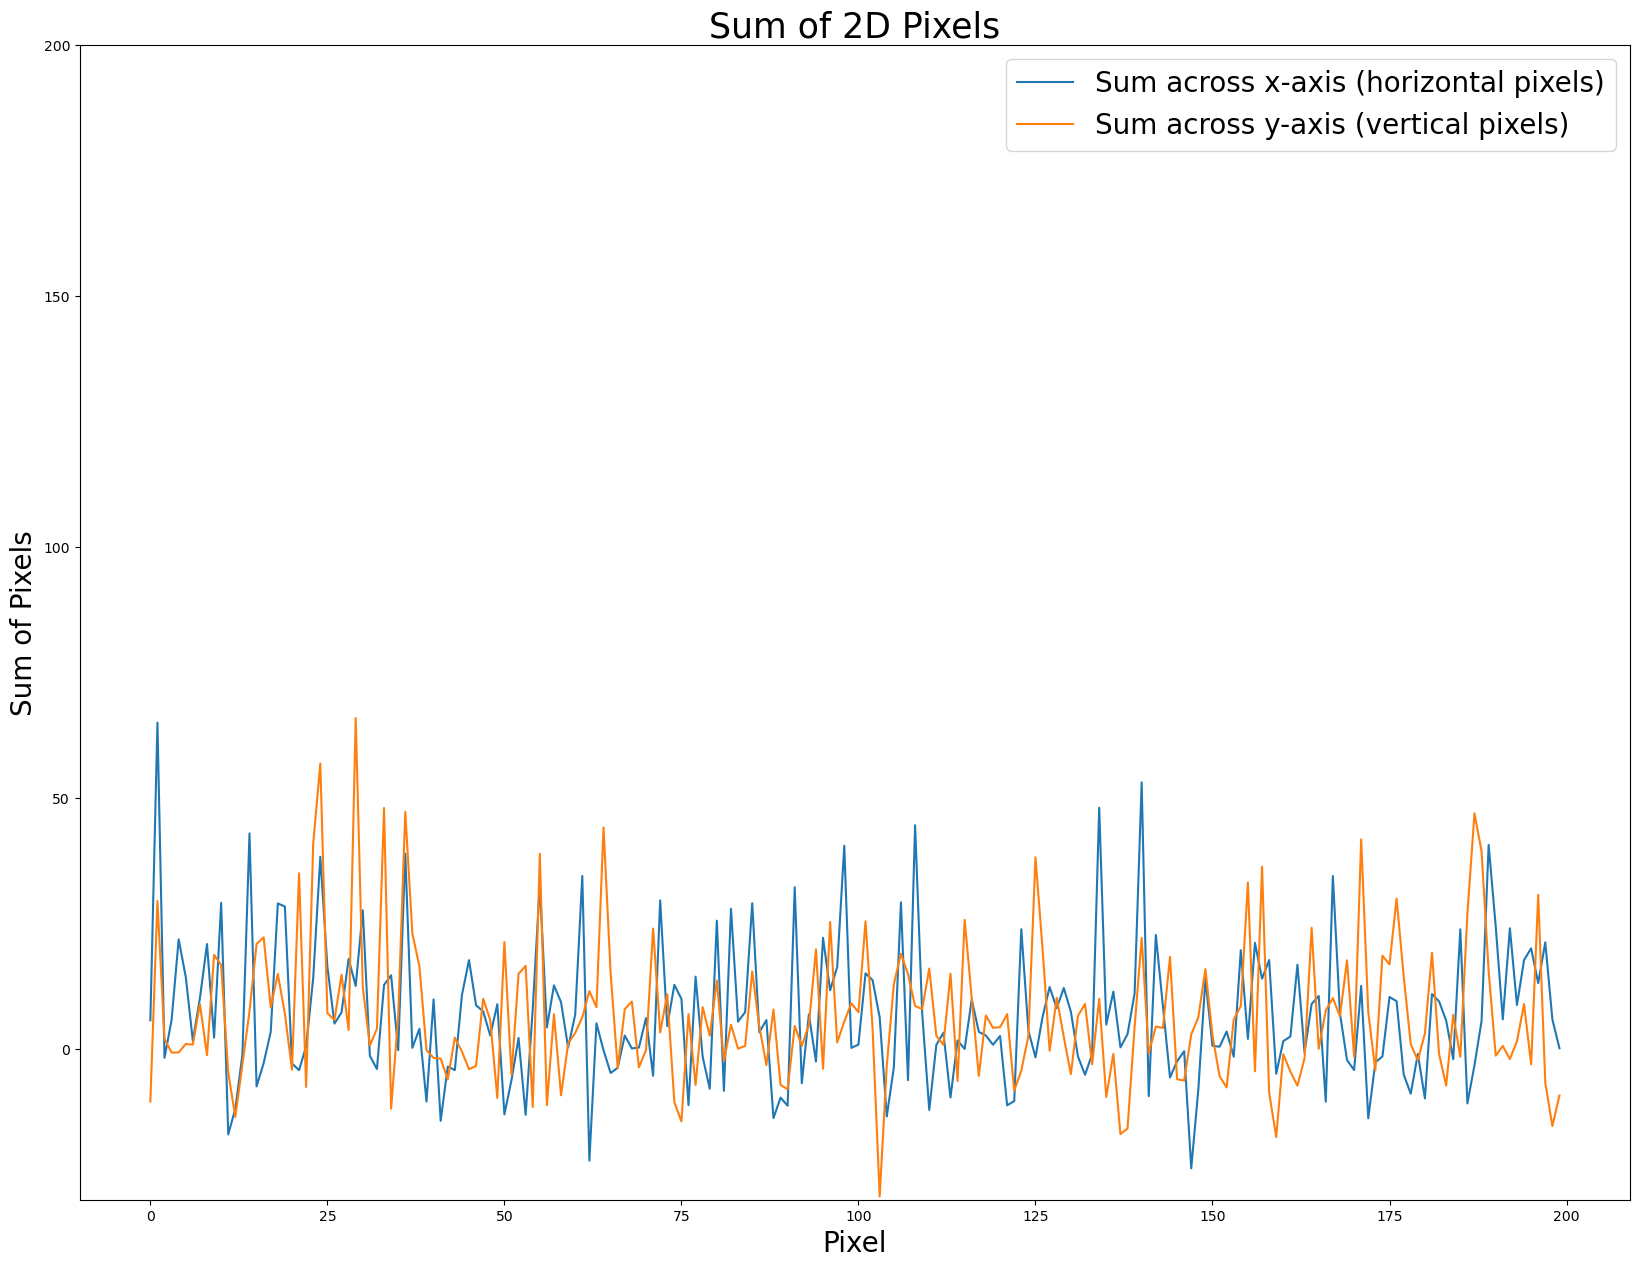

In [12]:
xsum = np.sum(imagestack[:,:,4], axis = 0)
ysum = np.sum(imagestack[:,:,4], axis = 1)
plt.plot(np.arange(0,200), xsum)
plt.plot(np.arange(0,200), ysum)
plt.title('Sum of 2D Pixels', fontsize = 25)
plt.xlabel('Pixel', fontsize = 20)
plt.ylabel('Sum of Pixels', fontsize = 20)
plt.legend(['Sum across x-axis (horizontal pixels)', 'Sum across y-axis (vertical pixels)'], fontsize = 20)
plt.ylim(-30, 200)

### 2 
<br>
There is definitely signal contamination that causes the fluctuation. Also, the graph above shows that it is relatively spatially consistent. Also, the background is not time dependence as the pixels are all taken in one shot at one image. However, if the time dependence is based on 10 images, then it is time dependent since there is still time difference between each snap of images.
<br>
To find the faintest star, I first need to find the background distribution of the image. After finding the distribution, I then need to get rid of the transient and the background noise. In order to achieve this, I subtract one image by another and end up with 9 noise data. I then average them to get the final average noise distibution pdf. After getting the noise distribution, I then calculate the 5-sigma threshold of the distribution and convert it back to the actual image distribution. I also average 10 images to get the average image distribution pdf. Finally, I put the 5 sigma threshold value onto average image pdf and get the faintest star.

Sigma = 0.9916199458787824


Text(0, 0.5, 'Probability')

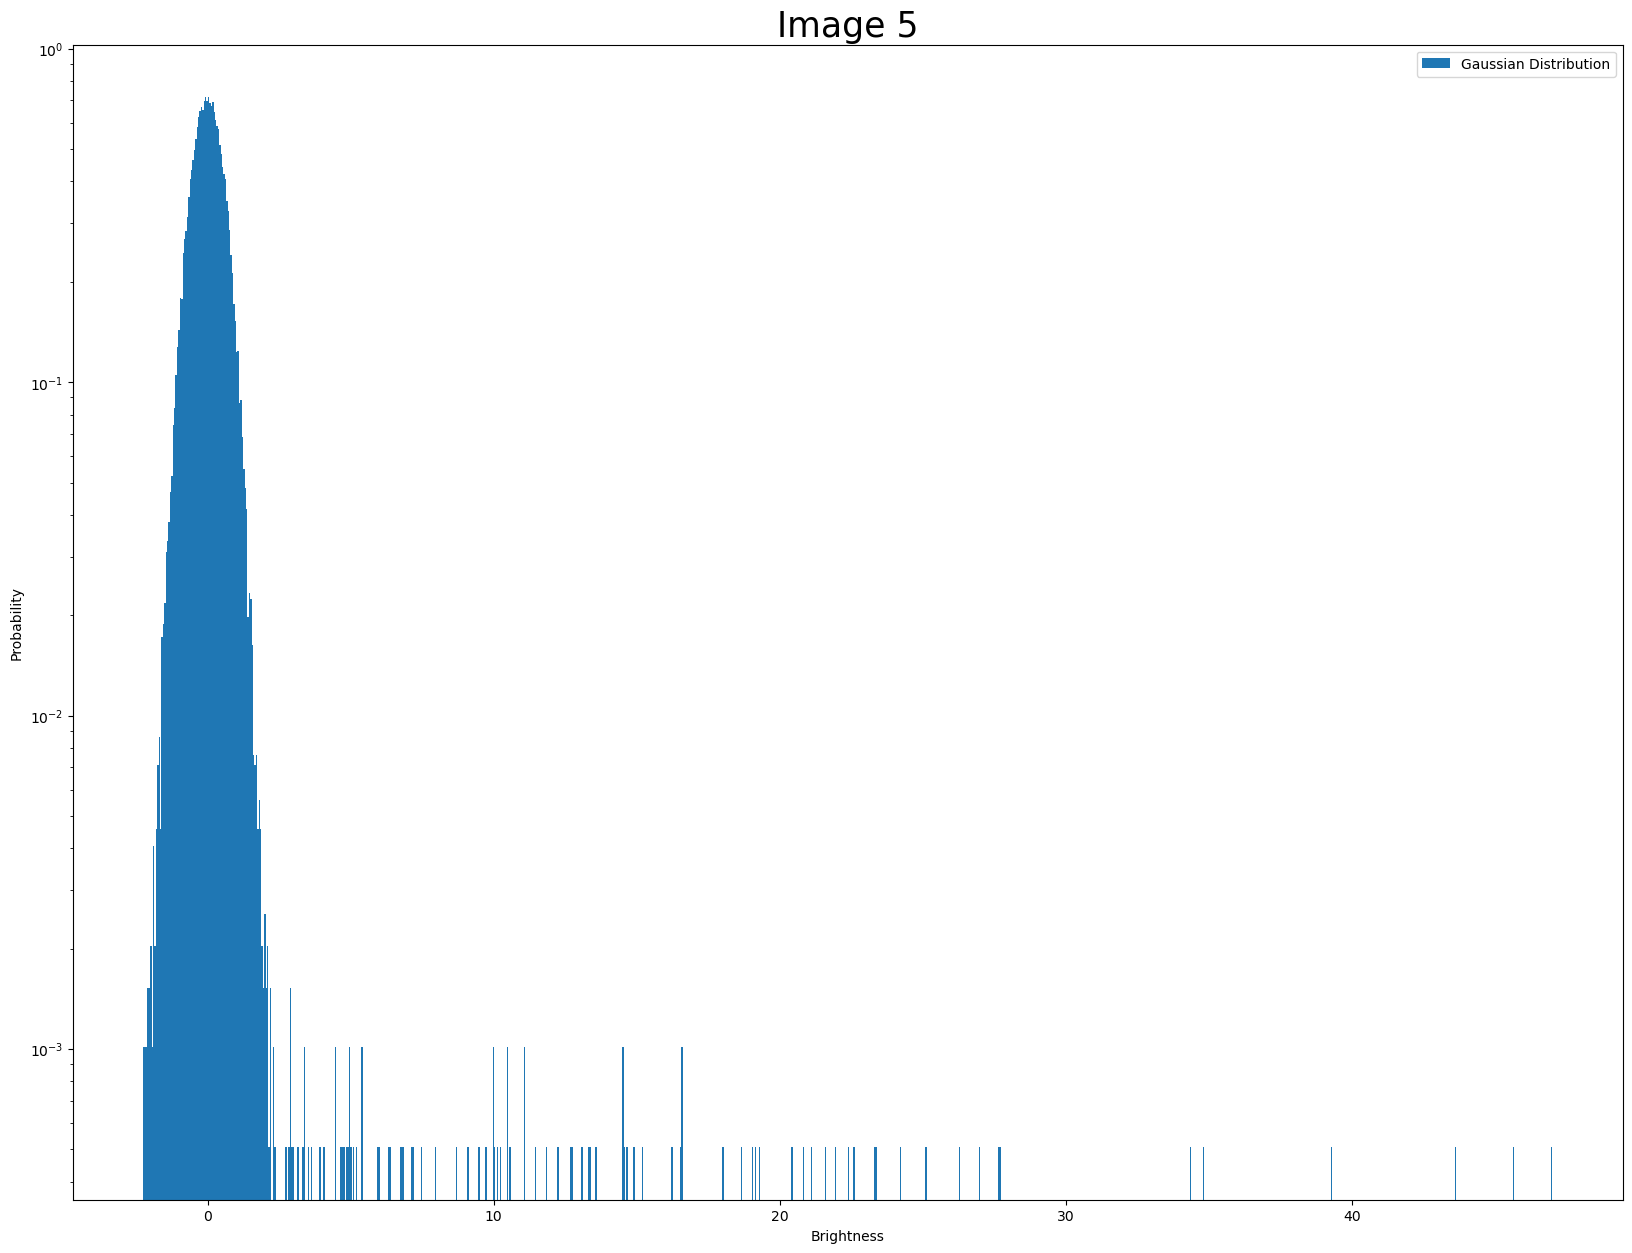

In [13]:
data5 = imagestack[:,:,4]
plt.hist(data5.ravel(), bins = 1000, density = True)
mu = 0
sigma = np.std(data5)
print('Sigma = ' + str(sigma))
x = np.linspace(-3,3,1000)
d = stats.norm(mu, sigma).pdf(x)
plt.yscale('log')
plt.title('Image 5', fontsize = 25)
plt.legend(['Gaussian Distribution', 'Data'])
plt.xlabel('Brightness')
plt.ylabel('Probability')

In [14]:
threshold5lower = stats.norm(mu, sigma).ppf(1 - stats.norm.sf(5))
threshold5upper = stats.norm(mu, sigma).ppf(1 - stats.norm.sf(6))
difference5 = threshold5upper - threshold5lower
print("Lower Threshold = " + str(threshold5lower))
print("Difference = " + str(difference5))

Lower Threshold = 4.958099729364338
Difference = 0.9916199368689078


Sigma = 0.1778348962220202


Text(0, 0.5, 'Probability')

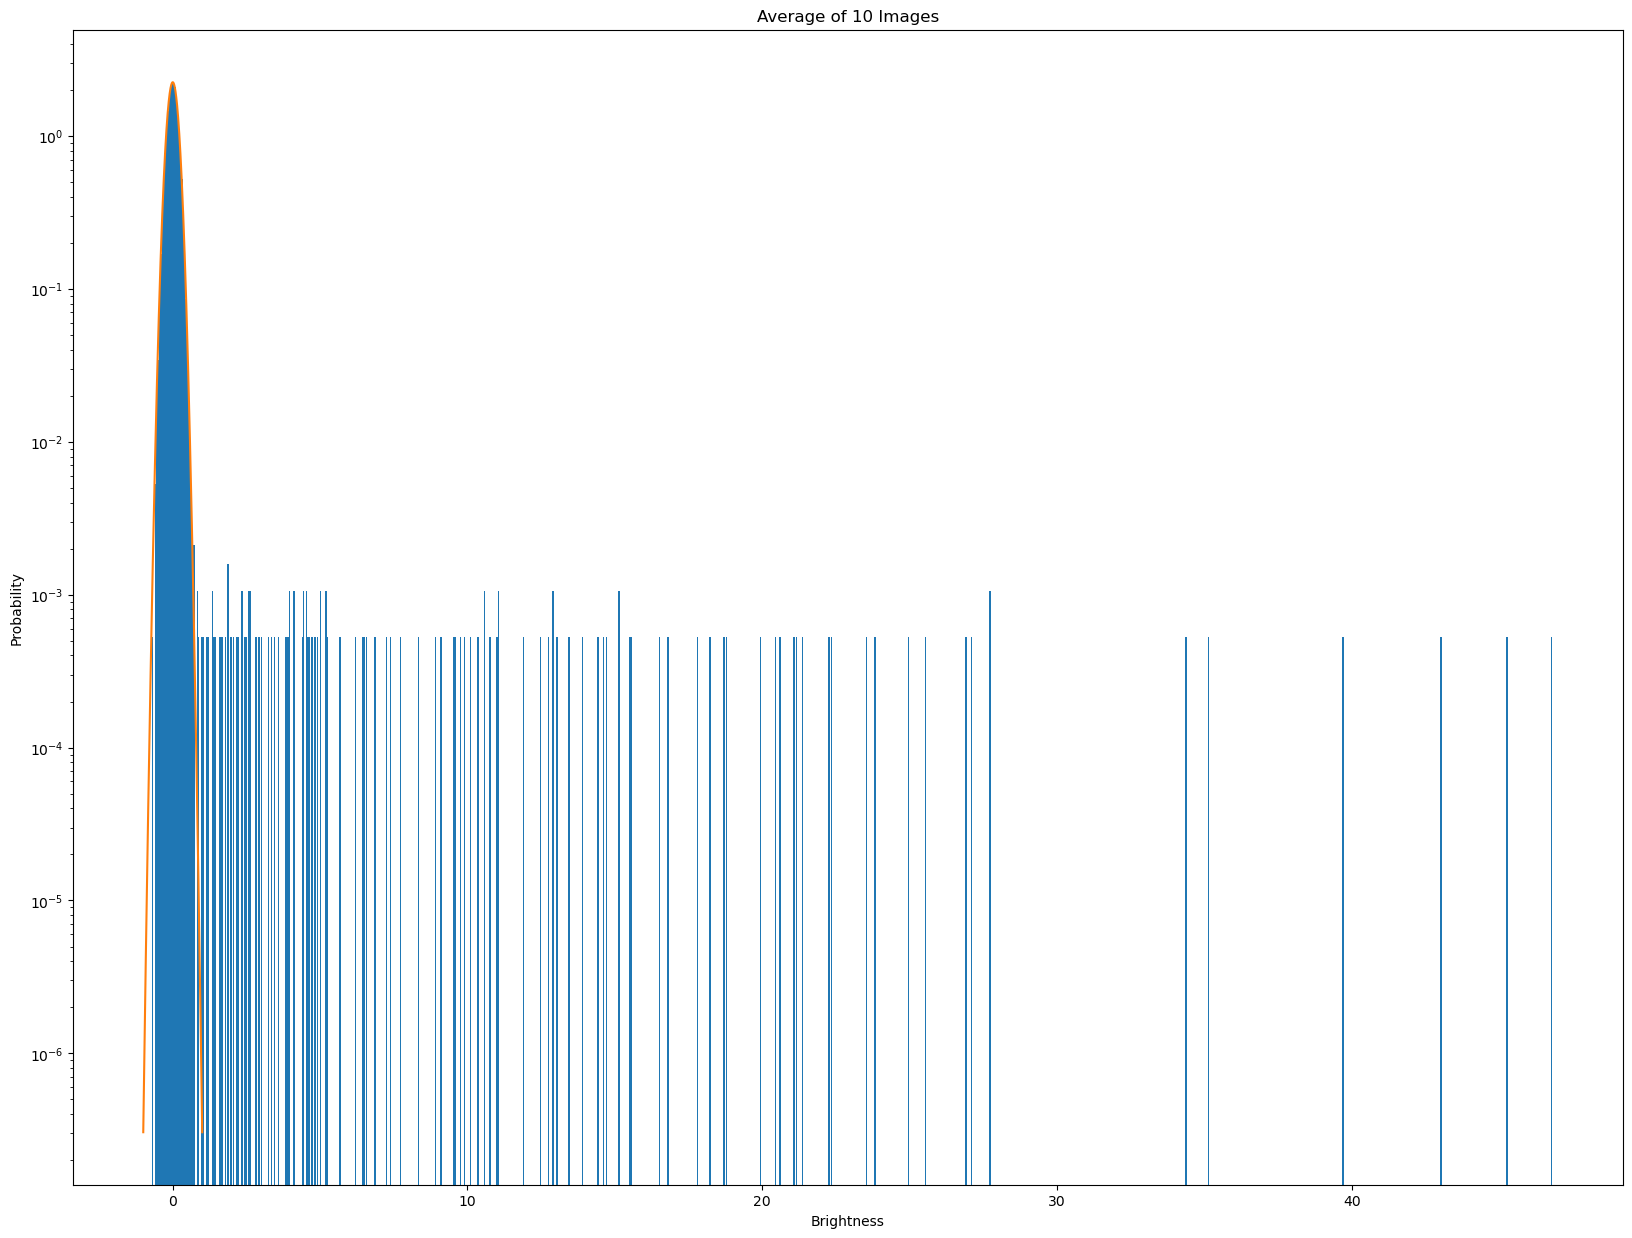

In [15]:
dataAverage = np.mean(imagestack[:,:,:], axis = 2)
plt.hist(dataAverage.ravel(), bins = 1000, density = True)
mu = 0
sigma = np.std(dataAverage[dataAverage < 1])
print('Sigma = ' + str(sigma))
x = np.linspace(-1,1,1000)
d = stats.norm(mu, sigma).pdf(x)
plt.plot(x, d, alpha = 1)
plt.yscale('log')
plt.title('Average of 10 Images')
plt.xlabel('Brightness')
plt.ylabel('Probability')

Sigma of Noise: 0.7925379712593625


Text(0, 0.5, 'Probability')

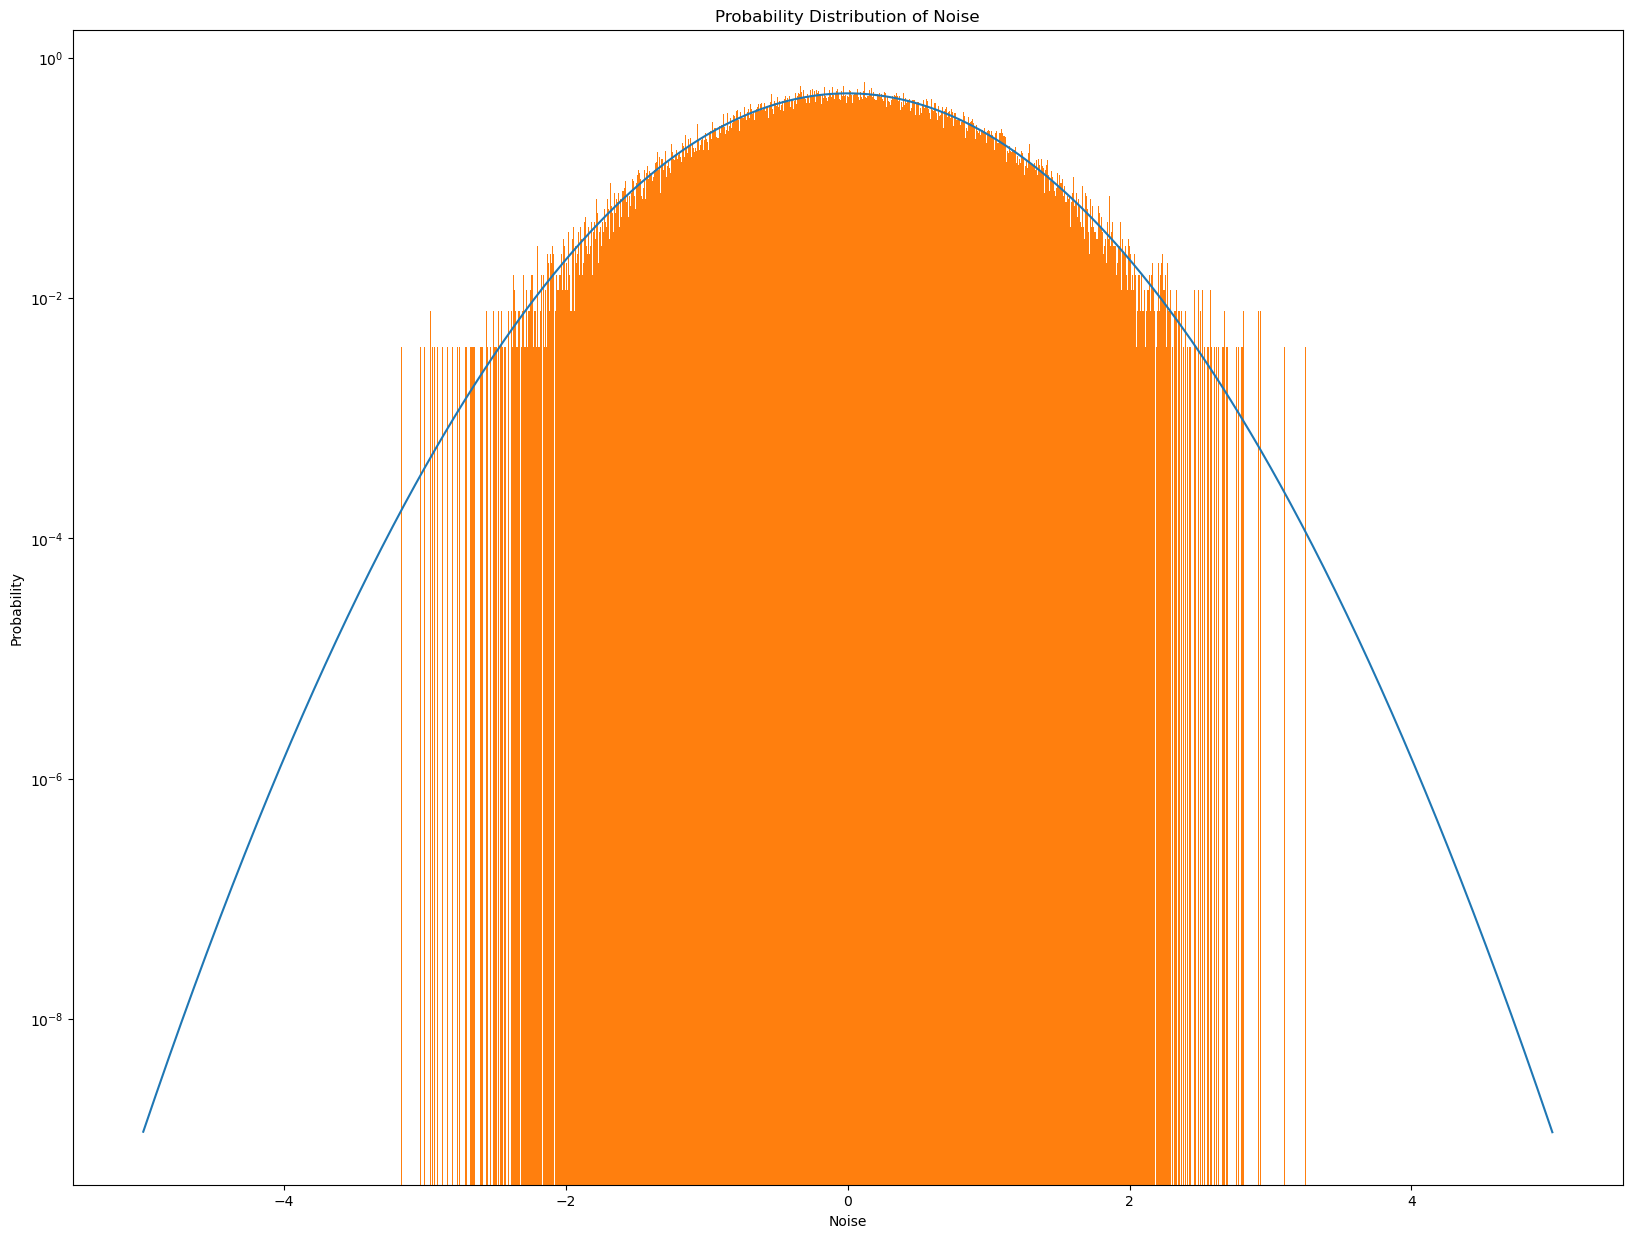

In [16]:
noise = imagestack[:,:,0] - imagestack[:,:,1]
meanN = np.mean(noise)
sigmaN = np.std(noise)
print("Sigma of Noise: " + str(sigmaN))
xN = np.linspace(-5,5,1000)
dN = stats.norm(meanN, sigmaN).pdf(xN)
plt.plot(xN, dN, alpha = 1)
plt.hist(noise.ravel(), bins = 1000, density = True)
plt.yscale('log')
plt.title('Probability Distribution of Noise')
plt.xlabel('Noise')
plt.ylabel('Probability')

In [17]:
print("Sigma of Image 0 background distribution: " + str(sigmaN / np.sqrt(2)))
print("5 sigma threshold: " + str((5*sigmaN) / np.sqrt(2)))

Sigma of Image 0 background distribution: 0.5604089738253243
5 sigma threshold: 2.8020448691266218


5 Sigma threshold for image 0 is way too big. I might not be able to see the faintest star that could be below 2.8 brightness.

In [18]:
noise = imagestack[:,:,0] - imagestack[:,:,1]
for x in range(1, 9):
    new = imagestack[:,:,x] - imagestack[:,:,x+1]
    noise = noise + new # total of 9 Gaussian
meanA = np.mean(noise / 9)
sigmaA = np.std(noise / 9)
print(meanA)
print(sigmaA)

-0.0006203590541809811
0.08772485077791763


In [19]:
sigmaResult = sigmaA / np.sqrt(10/9)
sigma5Result = sigmaResult * 5
print("Sigma of Average background distribution: " + str(sigmaResult))
print("5 sigma threshold: " + str(sigma5Result))

Sigma of Average background distribution: 0.08322310075698407
5 sigma threshold: 0.41611550378492035


3


Text(0, 0.5, 'Pixels')

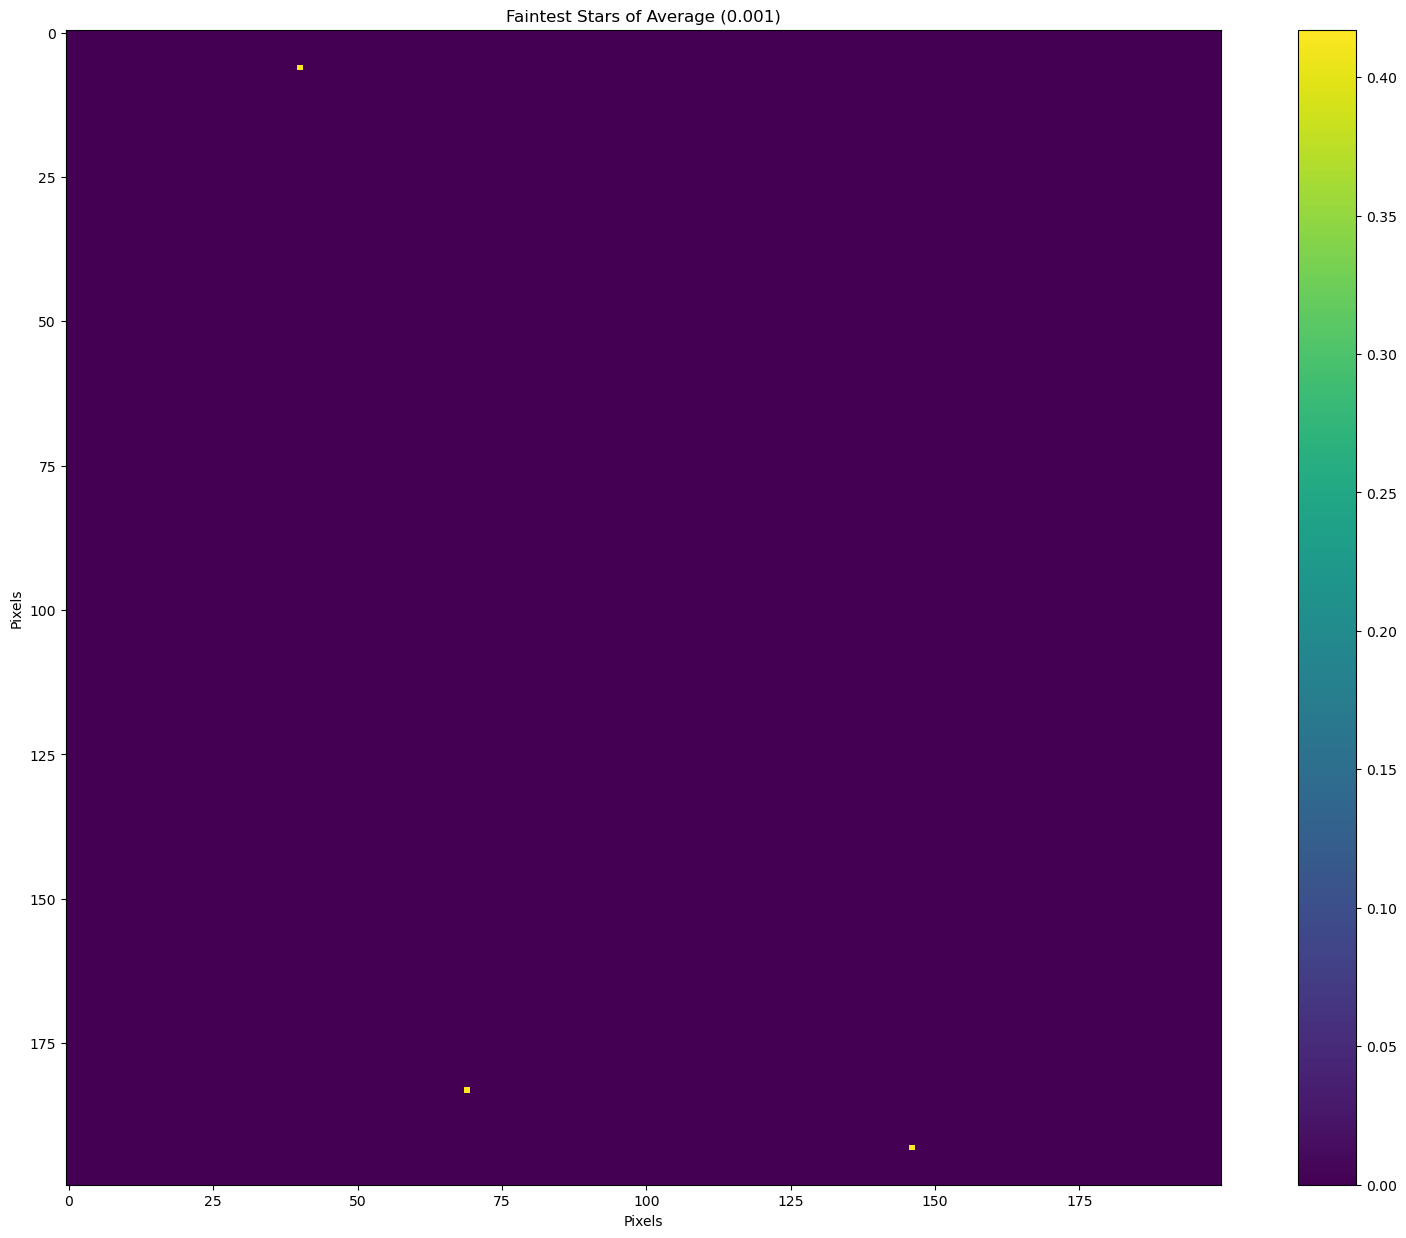

In [20]:
newThresholdAverage = (dataAverage > sigma5Result) & (dataAverage < sigma5Result + 0.001)
plt.figure()
plt.imshow(dataAverage * newThresholdAverage) 
print(len(dataAverage[newThresholdAverage]))
plt.colorbar()
plt.title('Faintest Stars of Average (0.001)')
plt.xlabel('Pixels')
plt.ylabel('Pixels')

### 3
<br>
I averaged the 10 images and used the 5 sigma threshold to find the faintest stars available. As shown from above, there are three faintest stars.

### 4

Even though we are using the same data, we are solving for different problems. For faintest star, I look into the pdf of the average of 10 images and use the 5 sigma threshold of the average noise pdf to find the faintest star. On the other hand, my partner is looking for the transient which means he has to look through all 10 images to find the transient. Therefore, his pdf will have the width that is larger than me as my average distribution will shrink the width of the distribtuion.